In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks, Plots, JLD2, Statistics, HypothesisTests
using Random: Xoshiro, AbstractRNG

In [3]:
include("resonator.jl")

factor3_test_spiking (generic function with 1 method)

In [4]:
using Base: @kwdef

In [5]:
@kwdef struct Args
	n_cb::Int = 20
	n_vsa::Int = 1024
	n_iters::Int = 20
	repeats::Int = 20
	rng::AbstractRNG
	spk_args::SpikingArgs
end


Args

In [6]:
dir = "data/resonator/"

"data/resonator/"

In [7]:
function test_cpu(args)
    return factor3_test(args.rng, args.n_cb, args.n_vsa, args.n_iters)
end

test_cpu (generic function with 1 method)

In [8]:
file = "/Users/wilkie/code/phasor_julia/data/resonator/final_2024-06-06T15:14:42.584.jld2"

"/Users/wilkie/code/phasor_julia/data/resonator/final_2024-06-06T15:14:42.584.jld2"

In [9]:
obj = load_object(file)

2-element Vector{Pair{String, Vector}}:
 "arguments" => Args[Args(20, 1024, 20, 10, Xoshiro(0xad17fbd0cd36cad9, 0xe4d41c7b921cc2bb, 0x0f244ba7a1cb4d0c, 0x39206badf0a5d323, 0x372cbd4b410e5a3b), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(20, 1024, 20, 10, Xoshiro(0x939831773e6d9992, 0xea9018f358e4f914, 0xafd96e371068686a, 0x0563f8202a459b83, 0xe8436c45c30dcf75), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(20, 1024, 20, 10, Xoshiro(0x761d9e8b7a194f48, 0x48b9aee60a875aab, 0xee891732c2f4a5f1, 0x97adaf4677231ee1, 0x1eb7ea28aa6c7525), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(20, 1024, 20, 10, Xoshiro(0x9233ceb4a383300c, 0xd89956f22e283eea, 0x0d719e114932d9a5, 0xdc620b951f9d946c, 0x65e63af579493bf7), Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)
), Args(20, 1024, 20, 10, Xoshiro(0xeb4a8e918f

In [17]:
cpu = test_cpu.(obj[1][2]);

In [18]:
data = obj[2][2]

256-element Vector{Dict{String, Any}}:
 Dict("trends" => ([0.1935699407657455 0.7063097707516031 … 0.9963917075346209 0.9963916975392291; 0.22926578490853117 0.6510885438498943 … 0.9975823917386228 0.9975823952313658; 0.20285474677368745 0.2655352311677183 … 0.9979860537268306 0.9979860562883939], [0.23935789014504238 0.17055510873561996 … 0.009144437379833982 0.009144431421874235; 0.2267125192040448 0.12841635858075093 … 0.02115614167729926 0.02115614036948138; … ; 0.20439120271714023 0.43580367319900093 … 0.05580760047794806 0.05580761875379726; 0.2092899334640107 0.10848733088913431 … 0.017659663716128694 0.01765966869377714]), "accuracy" => Bool[1, 1, 1])
 Dict("trends" => ([0.1752788052915158 0.6313041198535134 … 0.9972500609872134 0.9972500607519965; 0.22838933000435968 0.54907782813568 … 0.9972050380696575 0.9972050429614664; 0.21459730078774458 0.3359036344574873 … 0.998223377898632 0.9982233781338877], [0.1691656880617872 0.056948497093373907 … -0.016546708798360045 -0.0165467

In [19]:
#PICKUP - test if one of the runs which previously failed works with new normalization

In [26]:
acc_cpu = stack(c[1] for c in cpu)'

256×3 adjoint(::Matrix{Bool}) with eltype Bool:
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 ⋮     
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1

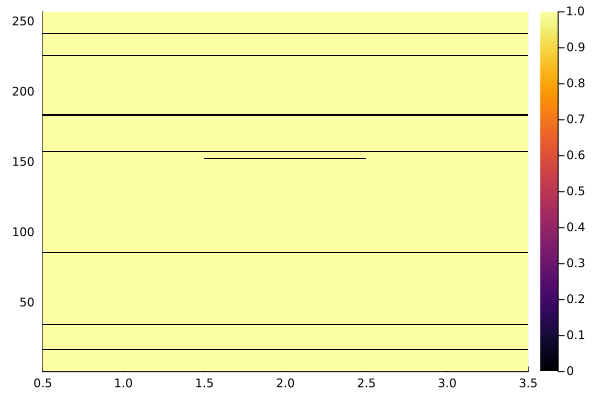

In [27]:
heatmap(acc_cpu)

In [28]:
acc_spk = stack([o["accuracy"] for o in data], dims=1)

256×3 Matrix{Bool}:
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 ⋮     
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1

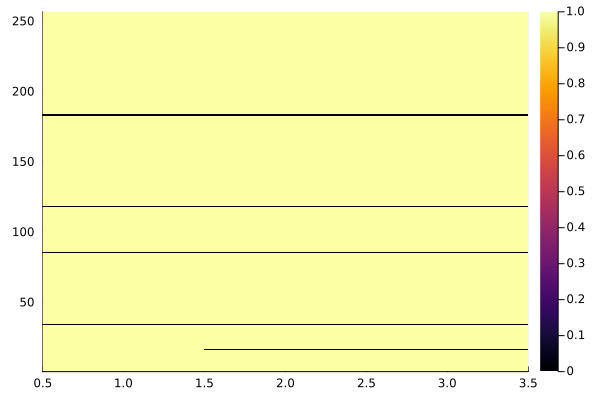

In [29]:
heatmap(acc_spk)

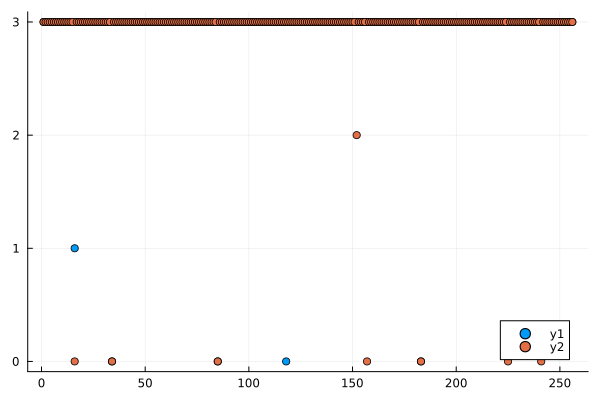

In [33]:
scatter(sum(acc_spk, dims=2))
scatter!(sum(acc_cpu, dims=2))

In [30]:
mean(vec(acc_spk))

0.9817708333333334

In [31]:
mean(vec(acc_cpu))

0.9713541666666666

In [34]:
trends_spk = [o["trends"] for o in data];

In [63]:
trend_true_spk = cat([t[1] for t in trends_spk]..., dims=1);

In [64]:
trend_false_spk = cat([t[2] for t in trends_spk]..., dims=1);

In [66]:
trend_true_spk |> size

(768, 21)

In [65]:
trend_false_spk |> size

(14592, 21)

In [67]:
trends_cpu = stack(c[2] for c in cpu);

In [69]:
trend_true_cpu = cat(trends_cpu[1,:]..., dims=1);

In [76]:
trend_false_cpu = cat(trends_cpu[2,:]..., dims=1);

In [77]:
size(trend_false_cpu)

(14592, 21)

In [84]:
mean_true_spk = mean(trend_true_spk, dims=1) |> vec
mean_false_spk = mean(trend_false_spk, dims=1) |> vec
mean_true_cpu = mean(trend_true_cpu, dims=1) |> vec
mean_false_cpu = mean(trend_false_cpu, dims=1) |> vec;

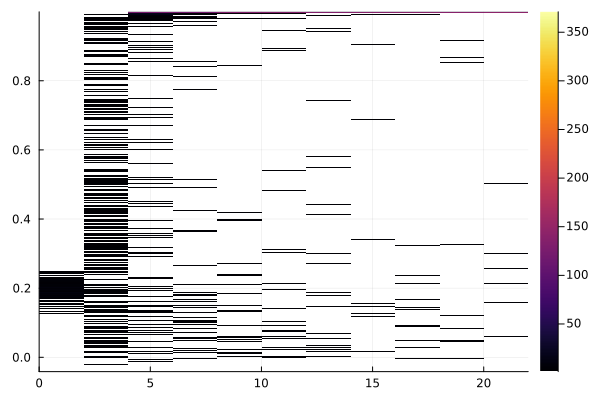

In [108]:
histogram2d(vec(repeat(1:21, 768)), vec(trend_true_cpu'))

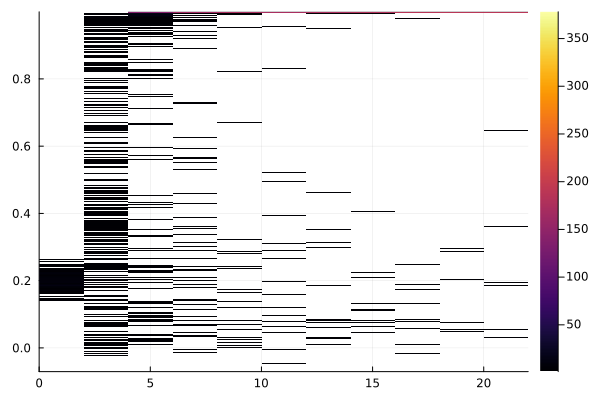

In [109]:
histogram2d(vec(repeat(1:21, 768)), vec(trend_true_spk'))

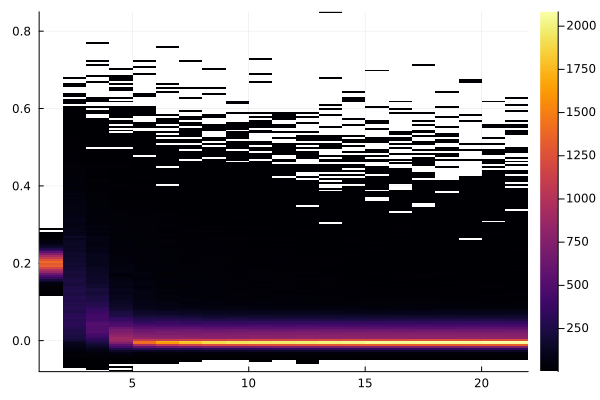

In [111]:
histogram2d(vec(repeat(1:21, 14592)), vec(trend_false_cpu'))

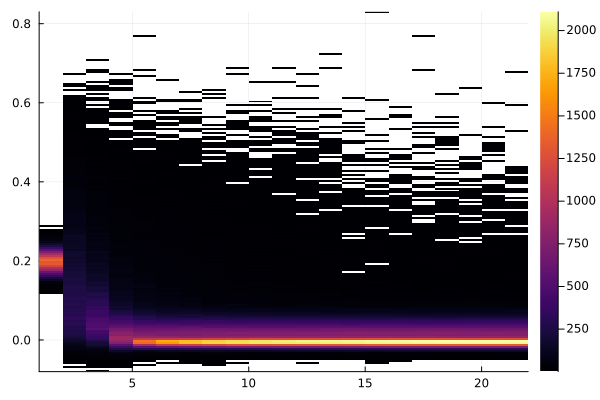

In [112]:
histogram2d(vec(repeat(1:21, 14592)), vec(trend_false_spk'))

In [119]:
ApproximateTwoSampleKSTest(vec(trend_true_cpu), vec(trend_true_spk))

Approximate two sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0455729

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-14

Details:
    number of observations:   [16128,16128]
    KS-statistic:              4.092437766783984


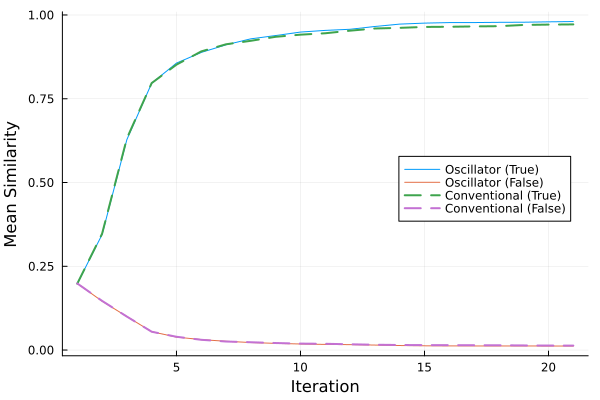

In [98]:
fig = plot(1:21, mean_true_spk, label="Oscillator (True)")
plot!(1:21, mean_false_spk, label="Oscillator (False)")

plot!(1:21, mean_true_cpu, label="Conventional (True)", line=(:dash,2))
plot!(1:21, mean_false_cpu, label="Conventional (False)", line=(:dash, 2))
xlabel!("Iteration")
ylabel!("Mean Similarity")
plot!(legend=:right)

In [123]:
MannWhitneyUTest(mean_true_cpu, mean_true_spk)

Exact Mann-Whitney U test
-------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          -0.0085668

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3557

Details:
    number of observations in each group: [21, 21]
    Mann-Whitney-U statistic:             183.0
    rank sums:                            [414.0, 489.0]
    adjustment for ties:                  0.0


In [124]:
MannWhitneyUTest(mean_false_cpu, mean_false_spk)

Exact Mann-Whitney U test
-------------------------
Population details:
    parameter of interest:   Location parameter (pseudomedian)
    value under h_0:         0
    point estimate:          0.00185442

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3825

Details:
    number of observations in each group: [21, 21]
    Mann-Whitney-U statistic:             256.0
    rank sums:                            [487.0, 416.0]
    adjustment for ties:                  0.0


In [99]:
png(fig, "resonator trends.png")

"resonator trends.png"